In [331]:
import pandas as pd
import matplotlib.pyplot as plt
from icecream import ic
import numpy as np

In [332]:
data = pd.read_csv('OIE_data.csv')

# add patient_id
patient_names = data['patientnumber'].unique()

for i, p_name in enumerate(patient_names):
    data.loc[data['patientnumber'] == p_name, 'patient_id'] = int(i)

In [333]:
ic(data.columns)
data.info()

ic| data.columns: Index(['patientnumber', 'malclass', 'PTH', 'age', 'sex', 'Ethnicity', 'Groups',
                         'Symptombeginn', 'Pittingquote_absolut_modified',
                         'Pittingquote_modified', 'Immunity', '[iE]', 'parasitemia', 'PfHRP2',
                         'Hkt', '[E]', 'Hb', 'LDH', 'Hapto', 'Thrombos', 'oiE_percent', '[oiE]',
                         'R_percent', '[R]', 'RPI', 'time', 'patient_id'],
                        dtype='object')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   patientnumber                  305 non-null    object 
 1   malclass                       305 non-null    object 
 2   PTH                            305 non-null    int64  
 3   age                            305 non-null    int64  
 4   sex                            305 non-null    object 
 5   Ethnicity                      305 non-null    object 
 6   Groups                         295 non-null    object 
 7   Symptombeginn                  285 non-null    float64
 8   Pittingquote_absolut_modified  145 non-null    float64
 9   Pittingquote_modified          145 non-null    float64
 10  Immunity                       195 non-null    object 
 11  [iE]                           61 non-null     float64
 12  parasitemia                    61 non-null     flo

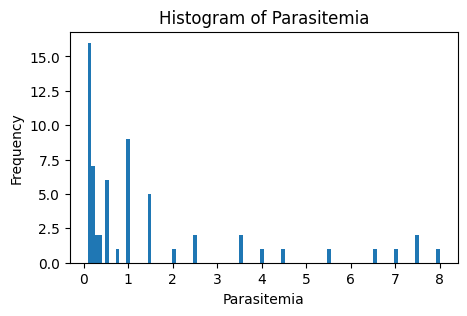

In [334]:
fig, ax = plt.subplots(figsize = (5, 3))

ax.hist(data['parasitemia'], bins=100)
ax.set_xlabel('Parasitemia')
ax.set_ylabel('Frequency')      
ax.set_title('Histogram of Parasitemia')
plt.show()  

In [335]:
def extract_patient(data: pd.DataFrame, patient_id: int) -> pd.DataFrame:    
    patient_df = data[data['patient_id'] == patient_id] 
    return patient_df

def list_patients(data: pd.DataFrame) -> list:
    patients = data['patient_id'].unique()
    return patients

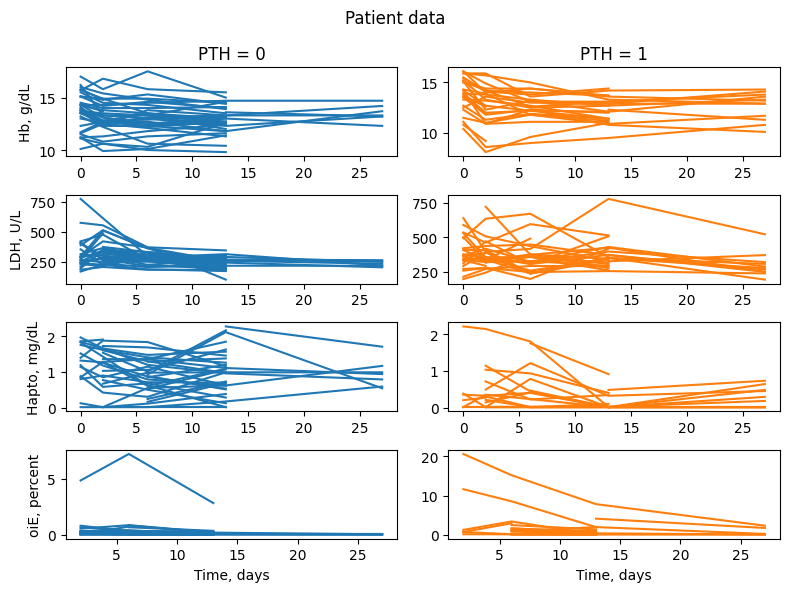

In [472]:
fig , ax = plt.subplots(4,2 , figsize = (8, 6))

for patient in list_patients(n_data):
    patient_df = extract_patient(n_data, patient)
    pth = int(patient_df['PTH'].values[0])

    color = [f'C{i}' for i in range(2)][pth]
    ax[0, pth].plot(patient_df['time'], patient_df['Hb'], label = patient, color=color)
    ax[1, pth].plot(patient_df['time'], patient_df['LDH'], label = patient, color=color)
    ax[2, pth].plot(patient_df['time'], patient_df['Hapto'], label = patient, color=color)
    ax[3, pth].plot(patient_df['time'], patient_df['oiE_percent'], label = patient, color=color)       


ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, g/dL')
ax[1, 0].set_ylabel('LDH, U/L')    
ax[2, 0].set_ylabel('Hapto, mg/dL')  
ax[3, 0].set_ylabel('oiE, percent')    

ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')

fig.suptitle('Patient data')
plt.tight_layout()
plt.show()

## Normalize values for entire feature

Entire feature vector (e.g. Hb) is normalized over all patients and timepoints, i.e. feature difference between patient persists

In [337]:
def normalize_hb(data: pd.DataFrame):
    data['Hb_norm'] = (data['Hb'] - data['Hb'].mean()) / data['Hb'].std()
    return data

def normalize_ldh(data: pd.DataFrame):
    data['LDH_norm'] = (data['LDH'] - data['LDH'].mean()) / data['LDH'].std()
    return data 

def normalize_hapto(data: pd.DataFrame):
    data['Hapto_norm'] = (data['Hapto'] - data['Hapto'].mean()) / data['Hapto'].std()
    return data 


def normalize_oie(data: pd.DataFrame):
    data['oiE_percent_norm'] = (data['oiE_percent'] - data['oiE_percent'].mean()) / data['oiE_percent'].std()
    return data 

def normalyize_data(data: pd.DataFrame):
    data = normalize_hb(data)
    data = normalize_ldh(data)
    data = normalize_hapto(data)
    data = normalize_oie(data)  
    return data 

In [338]:
n_data = normalyize_data(data)

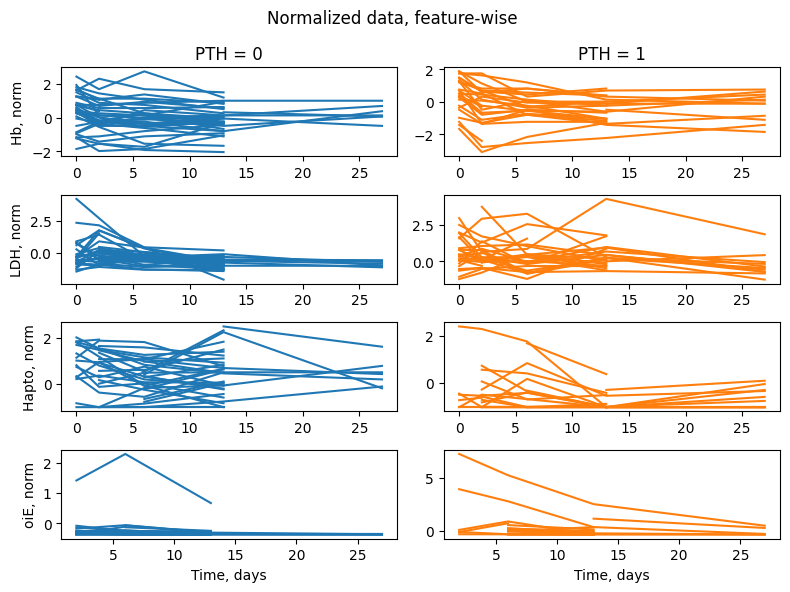

In [469]:
fig , ax = plt.subplots(4,2 , figsize = (8, 6))

for patient in list_patients(n_data):
    patient_df = extract_patient(n_data, patient)
    pth = int(patient_df['PTH'].values[0])

    color = [f'C{i}' for i in range(2)][pth]
    ax[0, pth].plot(patient_df['time'], patient_df['Hb_norm'], label = patient, color=color)
    ax[1, pth].plot(patient_df['time'], patient_df['LDH_norm'], label = patient, color=color)
    ax[2, pth].plot(patient_df['time'], patient_df['Hapto_norm'], label = patient, color=color)
    ax[3, pth].plot(patient_df['time'], patient_df['oiE_percent_norm'], label = patient, color=color)       


ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, norm')
ax[1, 0].set_ylabel('LDH, norm')    
ax[2, 0].set_ylabel('Hapto, norm')  
ax[3, 0].set_ylabel('oiE, norm')    

ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')
fig.suptitle('Normalized data, feature-wise ')
plt.tight_layout()
plt.show()

## Normalize features per patient

Here each features is normalized for each patient/individually

In [461]:
# Define a function to calculate normalized Hb values
def calculate_normalized_feat(patient_data, feature: str):
    mean_feat = patient_data[feature].mean()
    std_feat = patient_data[feature].std()
    normalized_feat = (patient_data[feature] - mean_feat)/std_feat
    return normalized_feat

def normalize_data_ind(data: pd.DataFrame, features: list):
    for feature in features:    
        for patient in list_patients(data):
            patient_df = extract_patient(data, patient)
            data.loc[data['patient_id'] == patient, f'{feature}_norm_ind'] = calculate_normalized_feat(patient_df, feature        )
    return data

In [462]:
n_data_ind = normalize_data_ind(n_data, ['Hb', 'LDH', 'Hapto', 'oiE_percent'])

In [430]:
n_data_ind.tail()

,patientnumber,malclass,PTH,age,sex,Ethnicity,Groups,Symptombeginn,Pittingquote_absolut_modified,Pittingquote_modified,...,patient_id,Hb_norm,LDH_norm,Hapto_norm,oiE_percent_norm,cluster,Hb_norm_ind,LDH_norm_ind,Hapto_norm_ind,oiE_percent_norm_ind
300,S9,severe,1,19,female,Non-African,NaN,7.0,NaN,NaN,...,60.0,-1.667176,1.573407,NaN,NaN,0.0,0.497880,-0.317615,NaN,NaN
301,S9,severe,1,19,female,Non-African,NaN,7.0,NaN,NaN,...,60.0,-3.094534,2.903667,-1.033786,NaN,0.0,-1.334319,0.668205,NaN,NaN
302,S9,severe,1,19,female,Non-African,NaN,7.0,NaN,NaN,...,60.0,-2.163648,3.240915,-1.033786,0.526260,0.0,-0.139406,0.918132,NaN,0.707107
303,S9,severe,1,19,female,Non-African,NaN,7.0,NaN,NaN,...,60.0,-1.294821,0.289988,-1.033786,0.117217,0.0,0.975845,-1.268723,NaN,-0.707107
304,S9,severe,1,19,female,Non-African,NaN,7.0,NaN,NaN,...,60.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


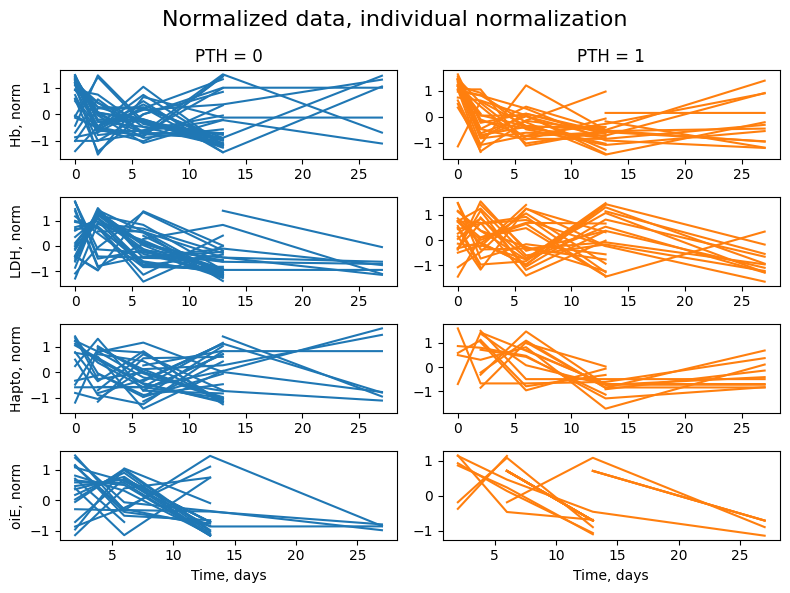

In [468]:
fig , ax = plt.subplots(4,2 , figsize = (8, 6))

for patient in list_patients(n_data):
    patient_df = extract_patient(n_data, patient)
    pth = int(patient_df['PTH'].values[0])

    color = [f'C{i}' for i in range(2)][pth]
    ax[0, pth].plot(patient_df['time'], patient_df['Hb_norm_ind'], label = patient, color=color)
    ax[1, pth].plot(patient_df['time'], patient_df['LDH_norm_ind'], label = patient, color=color)
    ax[2, pth].plot(patient_df['time'], patient_df['Hapto_norm_ind'], label = patient, color=color)
    ax[3, pth].plot(patient_df['time'], patient_df['oiE_percent_norm_ind'], label = patient, color=color)       


ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, norm')
ax[1, 0].set_ylabel('LDH, norm')    
ax[2, 0].set_ylabel('Hapto, norm')  
ax[3, 0].set_ylabel('oiE, norm')    

ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')

fig.suptitle('Normalized data, individual normalization', fontsize=16)
plt.tight_layout()
plt.show()

## Min-max scaling per patient

In [463]:
# Define a function to calculate normalized Hb values
def calculate_minmax_feat(patient_data, feature: str):
    max_feat = patient_data[feature].max()
    min_feat = patient_data[feature].min()
    normalized_feat = (patient_data[feature] - min_feat)/(max_feat-min_feat)
    return normalized_feat

def normalize_data_minmax_ind(data: pd.DataFrame, features: list):
    for feature in features:    
        for patient in list_patients(data):
            patient_df = extract_patient(data, patient)
            data.loc[data['patient_id'] == patient, f'{feature}_minmax_ind'] = calculate_minmax_feat(patient_df, feature        )
    return data

In [464]:
n_data = normalize_data_minmax_ind(n_data, ['Hb', 'LDH', 'Hapto', 'oiE_percent'])   

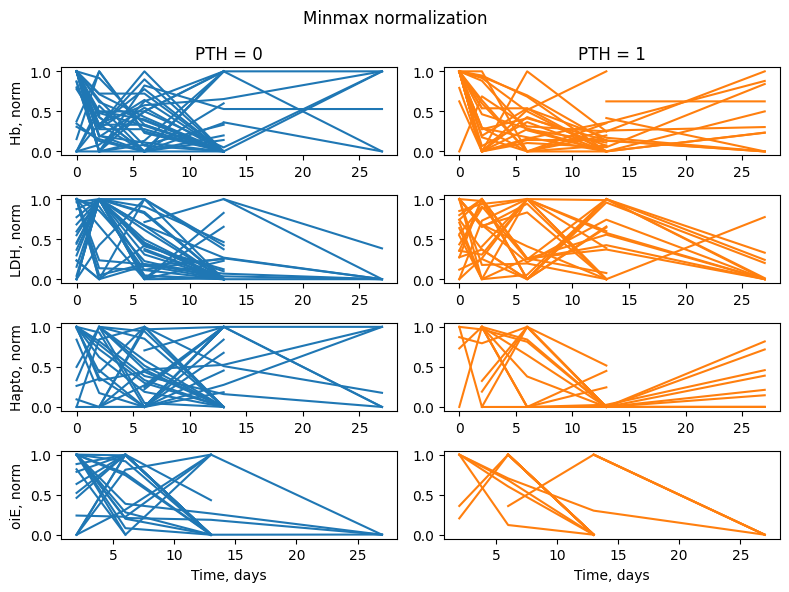

In [467]:
fig , ax = plt.subplots(4,2 , figsize = (8, 6))

for patient in list_patients(n_data):
    patient_df = extract_patient(n_data, patient)
    pth = int(patient_df['PTH'].values[0])

    color = [f'C{i}' for i in range(2)][pth]
    ax[0, pth].plot(patient_df['time'], patient_df['Hb_minmax_ind'], label = patient, color=color)
    ax[1, pth].plot(patient_df['time'], patient_df['LDH_minmax_ind'], label = patient, color=color)
    ax[2, pth].plot(patient_df['time'], patient_df['Hapto_minmax_ind'], label = patient, color=color)
    ax[3, pth].plot(patient_df['time'], patient_df['oiE_percent_minmax_ind'], label = patient, color=color)       


ax[3, 0].set_xlabel('Time, days')      
ax[3, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, norm')
ax[1, 0].set_ylabel('LDH, norm')    
ax[2, 0].set_ylabel('Hapto, norm')  
ax[3, 0].set_ylabel('oiE, norm')    

ax[0, 0].set_title('PTH = 0')
ax[0, 1].set_title('PTH = 1')

fig.suptitle('Minmax normalization')
plt.tight_layout()
plt.show()

# Clustering

In [431]:
def extract_patient_vector(data: pd.DataFrame, patient_id: int, features:list = ['Hb_norm', 'LDH_norm', 'Hapto_norm']) -> pd.DataFrame:    
    patient_df = data[data['patient_id'] == patient_id] 
    patient_vector = patient_df[features].values.T.flatten()
    return patient_vector

def stack_p_vectors(data: pd.DataFrame, features: list = ['Hb_norm', 'LDH_norm', 'Hapto_norm', 'oiE_percent_norm']) -> np.array:
    patient_vectors = []
    for patient in list_patients(data):
        patient_vector = extract_patient_vector(data, patient, features=features)
        patient_vectors.append(patient_vector)
    patient_vectors = np.array(patient_vectors)
    return patient_vectors  

In [432]:
X = stack_p_vectors(n_data, features=['Hb_norm_ind', 'LDH_norm_ind', 'Hapto_norm_ind', 'oiE_percent_norm_ind']) 

In [433]:
X.shape

(61, 20)

In [434]:
ic('Total number of non-NaN values in X:', X.shape[0] * X.shape[1])
ic('Number of non-NaN values in X:', np.count_nonzero(~np.isnan(X)))

ic| 'Total number of non-NaN values in X:': 'Total number of non-NaN values in X:'
    X.shape[0] * X.shape[1]: 1220
ic| 'Number of non-NaN values in X:': 'Number of non-NaN values in X:'
    np.count_nonzero(~np.isnan(X)): 806


('Number of non-NaN values in X:', 806)

In [435]:
percent_nan_per_feature = np.sum(np.isnan(X), axis=0) / X.shape[0]


ic| ax.get_xticks(): array([-5.,  0.,  5., 10., 15., 20., 25.])


Text(0.5, 0, 'Time, days')

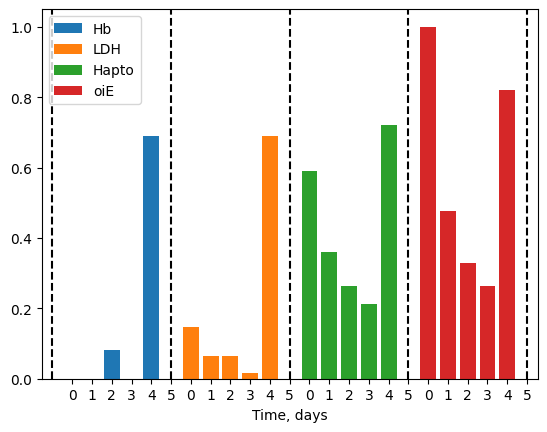

In [436]:
fig, ax =  plt.subplots()
hbs = percent_nan_per_feature[0:5]
ldhs = percent_nan_per_feature[5:10]    
haptos = percent_nan_per_feature[10:15] 
oiEs = percent_nan_per_feature[15:20]   

ax.bar(0 + np.arange(5), hbs, label = 'Hb') 
ax.bar(6 + np.arange(5), ldhs, label = 'LDH')   
ax.bar(12 + np.arange(5), haptos, label = 'Hapto')   
ax.bar(18 + np.arange(5), oiEs, label = 'oiE')   

ax.axvline(-1, color='k', linestyle='--')
ax.axvline(5, color='k', linestyle='--')
ax.axvline(11, color='k', linestyle='--')
ax.axvline(17, color='k', linestyle='--')
ax.axvline(23, color='k', linestyle='--')

ax.legend()
ic(ax.get_xticks()) 
ax.set_xticks(np.arange(0,24))
ax.set_xticklabels(np.arange(0,24)%6)
ax.set_xlabel('Time, days')

In [437]:
percent_nan_per_patient = np.sum(np.isnan(X), axis=1) / X.shape[1]  
ic(np.median(percent_nan_per_patient))
ic(np.where(percent_nan_per_patient <= np.median(percent_nan_per_patient)))
np.sum(percent_nan_per_patient <= np.median(percent_nan_per_patient))

ic| np.median(percent_nan_per_patient): 0.35
ic| np.where(percent_nan_per_patient <= np.median(percent_nan_per_patient)): (array([ 3,  6, 10, 11, 12, 13, 14, 15, 17, 18, 21, 22, 24, 25, 26, 27, 28,
                                                                                    29, 31, 32, 33, 34, 35, 38, 40, 41, 43, 44, 45, 46, 47, 49, 52, 53,
                                                                                    55, 58]),)


36

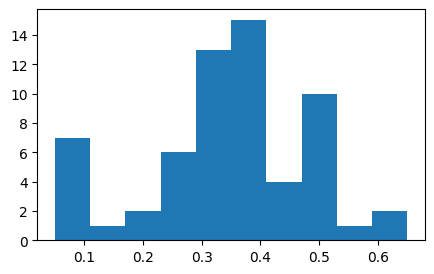

In [438]:
fig ,ax = plt.subplots(figsize = (5, 3))    

ax.hist(percent_nan_per_patient, bins=10)

plt.show()  

In [439]:
patients_to_keep = np.where(percent_nan_per_patient <= 0.35)[0] # 
X_reduced = X[patients_to_keep] 

# Use k-POD for Clustering

k-POD is Kmeans for sparse data [Here](https://arxiv.org/pdf/1411.7013.pdf).

In [440]:
# import the k_pod method
from kPOD import k_pod


In [441]:
# set the number of clusters desired (in this example, 3)
K = 2

# use previously existing data to perform clustering
clustering_results = k_pod(X_reduced, K)

# save the cluster assignments and centers
cluster_assignments = clustering_results[0]
cluster_centers = clustering_results[1]

ic(X_reduced.shape)

ic| X_reduced.shape: (36, 20)


(36, 20)

In [442]:
patients_to_keep, cluster_assignments

(array([ 3,  6, 10, 11, 12, 13, 14, 15, 17, 18, 21, 22, 24, 25, 26, 27, 28,
        29, 31, 32, 33, 34, 35, 38, 40, 41, 43, 44, 45, 46, 47, 49, 52, 53,
        55, 58]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
        1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 1.]))

In [444]:
cluster_assignments_full = -np.ones(len(n_data['patient_id'].unique()))
cluster_assignments_full[patients_to_keep] = cluster_assignments 
cluster_assignments_full


array([-1., -1., -1.,  0., -1., -1.,  0., -1., -1., -1.,  0.,  0.,  0.,
        0.,  0.,  0., -1.,  0.,  0., -1., -1.,  0.,  0., -1.,  1.,  0.,
        1.,  0.,  0.,  1., -1.,  0.,  0.,  0.,  1.,  0., -1., -1.,  0.,
       -1.,  1.,  0., -1.,  0.,  0.,  0.,  0.,  0., -1.,  0., -1., -1.,
        0.,  0., -1.,  0., -1., -1.,  1., -1., -1.])

In [445]:
n_data['cluster'] = n_data.apply(lambda row: cluster_assignments_full[int(row['patient_id']) ], axis = 1) 

In [446]:
for p_id in list_patients(n_data):
    cluster = n_data[n_data['patient_id'] == p_id]['cluster'].values[0] 
    pth = n_data[n_data['patient_id'] == p_id]['PTH'].values[0] 
    ic(p_id, cluster, pth, cluster - pth)  


ic| p_id: 0.0, cluster: -1.0, pth: 0, cluster - pth: -1.0
ic| p_id: 1.0, cluster: -1.0, pth: 0, cluster - pth: -1.0
ic| p_id: 2.0, cluster: -1.0, pth: 1, cluster - pth: -2.0
ic| p_id: 3.0, cluster: 0.0, pth: 0, cluster - pth: 0.0
ic| p_id: 4.0, cluster: -1.0, pth: 1, cluster - pth: -2.0
ic| p_id: 5.0, cluster: -1.0, pth: 1, cluster - pth: -2.0
ic| p_id: 6.0, cluster: 0.0, pth: 0, cluster - pth: 0.0
ic| p_id: 7.0, cluster: -1.0, pth: 1, cluster - pth: -2.0
ic| p_id: 8.0, cluster: -1.0, pth: 0, cluster - pth: -1.0
ic| p_id: 9.0, cluster: -1.0, pth: 0, cluster - pth: -1.0
ic| p_id: 10.0, cluster: 0.0, pth: 1, cluster - pth: -1.0
ic| p_id: 11.0, cluster: 0.0, pth: 1, cluster - pth: -1.0
ic| p_id: 12.0, cluster: 0.0, pth: 1, cluster - pth: -1.0
ic| p_id: 13.0, cluster: 0.0, pth: 0, cluster - pth: 0.0
ic| p_id: 14.0, cluster: 0.0, pth: 0, cluster - pth: 0.0
ic| p_id: 15.0, cluster: 0.0, pth: 1, cluster - pth: -1.0
ic| p_id: 16.0, cluster: -1.0, pth: 0, cluster - pth: -1.0
ic| p_id: 17.0, clu

In [447]:
data.columns

Index(['patientnumber', 'malclass', 'PTH', 'age', 'sex', 'Ethnicity', 'Groups',
       'Symptombeginn', 'Pittingquote_absolut_modified',
       'Pittingquote_modified', 'Immunity', '[iE]', 'parasitemia', 'PfHRP2',
       'Hkt', '[E]', 'Hb', 'LDH', 'Hapto', 'Thrombos', 'oiE_percent', '[oiE]',
       'R_percent', '[R]', 'RPI', 'time', 'patient_id', 'Hb_norm', 'LDH_norm',
       'Hapto_norm', 'oiE_percent_norm', 'cluster', 'Hb_norm_ind',
       'LDH_norm_ind', 'Hapto_norm_ind', 'oiE_percent_norm_ind'],
      dtype='object')

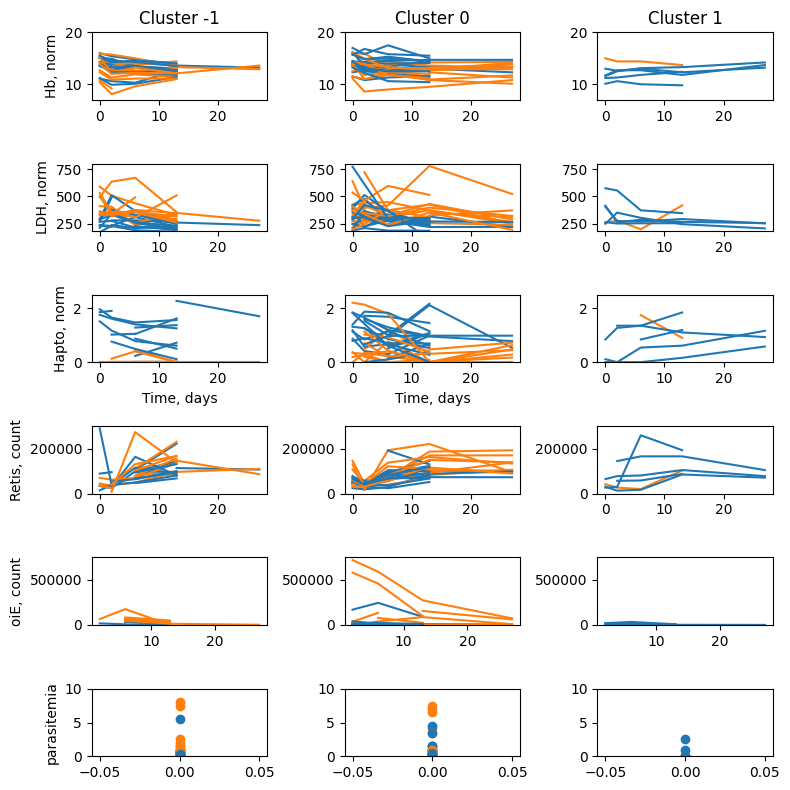

In [448]:
fig , ax = plt.subplots(6,K+1 , figsize = (4*K, 8))

for patient in list_patients(n_data):
    patient_df = extract_patient(n_data, patient)
    cluster = int(patient_df['cluster'].values[0])
    pth = int(patient_df['PTH'].values[0])

    col = cluster + 1

    color = [f'C{i}' for i in range(K)][pth]
    ax[0,col].plot(patient_df['time'], patient_df['Hb'], label = patient, color=color)
    ax[1,col].plot(patient_df['time'], patient_df['LDH'], label = patient, color=color)
    ax[2,col].plot(patient_df['time'], patient_df['Hapto'], label = patient, color=color)
    ax[3,col].plot(patient_df['time'], patient_df['[R]'], label = patient, color=color)
    ax[4,col].plot(patient_df['time'], patient_df['[oiE]'], label = patient, color=color)
    ax[5,col].scatter(patient_df['time'], patient_df['parasitemia'], label = patient, color=color)

    ax[0,col].set_ylim(7, 20)
    ax[1,col].set_ylim(180, 800)
    ax[2,col].set_ylim(0, 2.5)
    ax[3,col].set_ylim(0, 3e5)
    ax[4,col].set_ylim(0, 7.5e5)
    ax[5, col].set_ylim(0, 10)

    ax[0, col].set_title(f'Cluster {cluster}')


ax[2, 0].set_xlabel('Time, days')  
ax[2, 1].set_xlabel('Time, days')      

ax[0, 0].set_ylabel('Hb, norm')
ax[1, 0].set_ylabel('LDH, norm')    
ax[2, 0].set_ylabel('Hapto, norm') 
ax[3, 0].set_ylabel('Retis, count')
ax[4, 0].set_ylabel('oiE, count')    
ax[5, 0].set_ylabel('parasitemia')    

plt.tight_layout()
plt.show()

In [237]:
def plot_patient(data: pd.DataFrame, patient_id: int, features:list = ['Hb_norm', 'LDH_norm', 'Hapto_norm']):
    patient_df = extract_patient(data, patient_id)
    fig , ax = plt.subplots(len(features),1 , figsize = (5, 3))
    for i, feature in enumerate(features):
        ax[i].plot(patient_df['time'], patient_df[feature], label = feature)
        ax[i].set_ylabel(feature)
    ax[len(features) - 1].set_xlabel('Time, days')      
   
    plt.tight_layout()
    plt.show()  

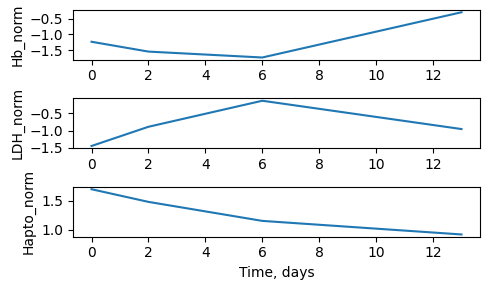

In [238]:
plot_patient(n_data, 1) 

In [239]:
n_data_drop = n_data.dropna(inplace=False)

In [241]:
n_data_drop

,patientnumber,malclass,PTH,age,sex,Ethnicity,Groups,Symptombeginn,Pittingquote_absolut_modified,Pittingquote_modified,...,[oiE],R_percent,[R],RPI,time,patient_id,Hb_norm,LDH_norm,Hapto_norm,cluster
